# Module 5: T-Tests
## Hypothesis Testing Using a T-distribution
## Hawken Hass
## University of North Carolina Wilmington

# One Sample T-Test
T-tests are appropriate for identifying a significant mean difference between two groups. A one sample t-test is used when you want to compare a sample mean to a population mean. This test will tell you if the sample mean is signficantly different from the population mean. First, let's read in some data and activate the necessary packages.

In [1]:
lake_data<-read.table("lake_data.txt")
lake_data

Month,Period,SeaHawk,Randall
Jan,2001-2019,3.125990,10.915324
Feb,2001-2019,12.441331,5.148206
Mar,2001-2019,3.230104,5.982370
Apr,2001-2019,10.907835,6.179094
May,2001-2019,9.674827,8.532295
Jun,2001-2019,8.033946,6.132740
Jul,2001-2019,12.318558,14.437468
Aug,2001-2019,6.557286,11.269315
Sep,2001-2019,6.057994,15.059383
Oct,2001-2019,12.040164,10.124065


In [2]:
library(dplyr)
library(lsr)
library(car)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



## Assumptions
Before running the analyses we first need to check our assumptions. The assumptions are as follows:
1. One continuous dependent variable (interval or ratio)
2. One discrete independent variable (categorical, ordinal, or dichotomous with no more than two levels)
3. Each data point is independent of one another
4. Data is normally distributed (bell-curve shaped)
5. No outliers

Assumptions 1-3 are typically accounted for when designing the study prior to analysis. Assumptions 4-5 can be checked using graphs and statistical tests.

### Normality


Normality can be visually assessed with various types of graphs. In this example the dependent variable is the average monthly rainfall at Randall Lake. There are a few graphs that are appropriate for assessing normality: a histogram, a density plot, or a QQ-plot. Let's activate the ggplot2 package so we can visualize our data.

In [3]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


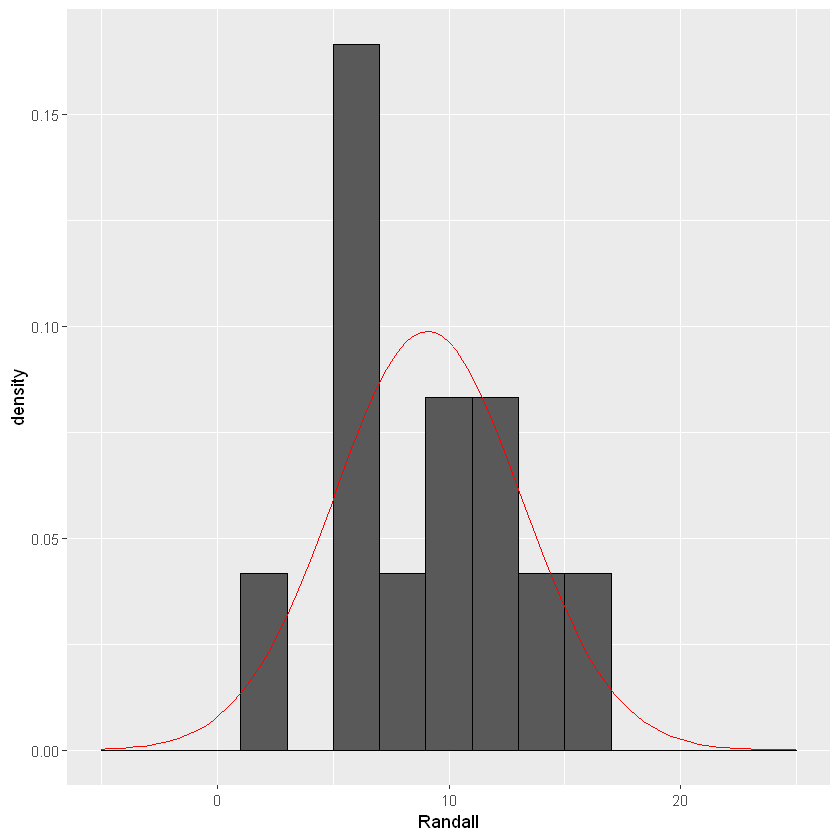

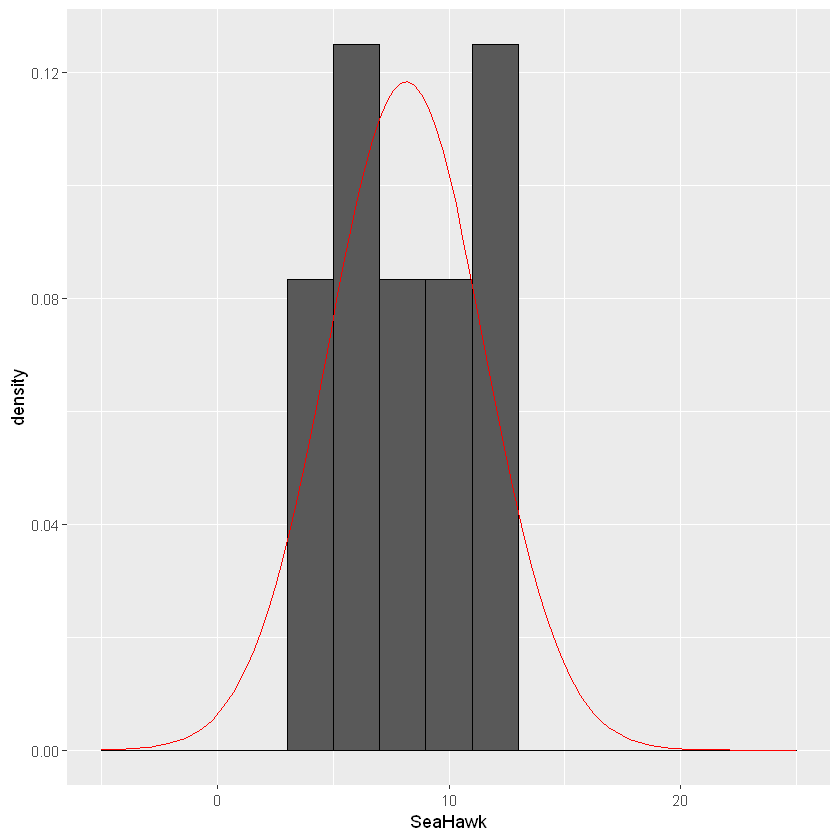

In [4]:
ggplot(lake_data, aes(x=Randall))+geom_histogram(binwidth=2, colour="black",aes(y=..density..))+
stat_function(fun=dnorm,color="red",args=list(mean=mean(lake_data$Randall),  sd=sd(lake_data$Randall)))+ scale_x_continuous(limits = c(-5, 25))

ggplot(lake_data, aes(x=SeaHawk))+geom_histogram(binwidth=2, colour="black",aes(y=..density..))+
stat_function(fun=dnorm,color="red",args=list(mean=8.15,sd=sd(lake_data$SeaHawk)))+ scale_x_continuous(limits = c(-5, 25))


The shape of the histogram will tell us if the data is normally distributed. If the data is shaped like a bell-curve, we can assume the data is normally distributed.  With the stat_function() function I added a reference for what a normally distribution curve would look like (red line).Sometimes it is difficult to tell the shape with a histogram, and a density plot may be more appropriate.

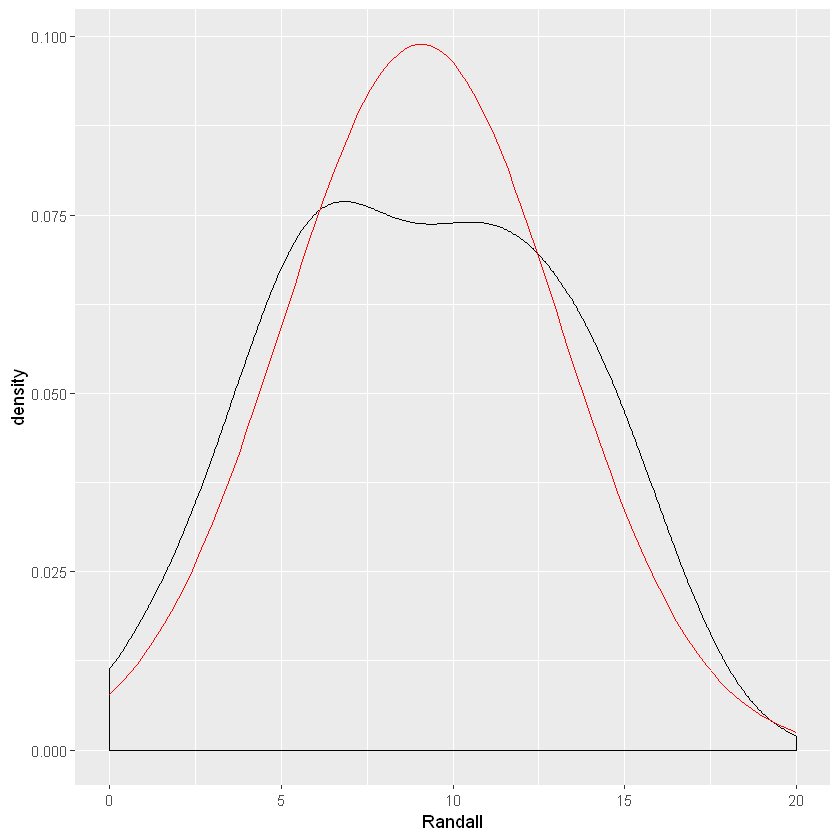

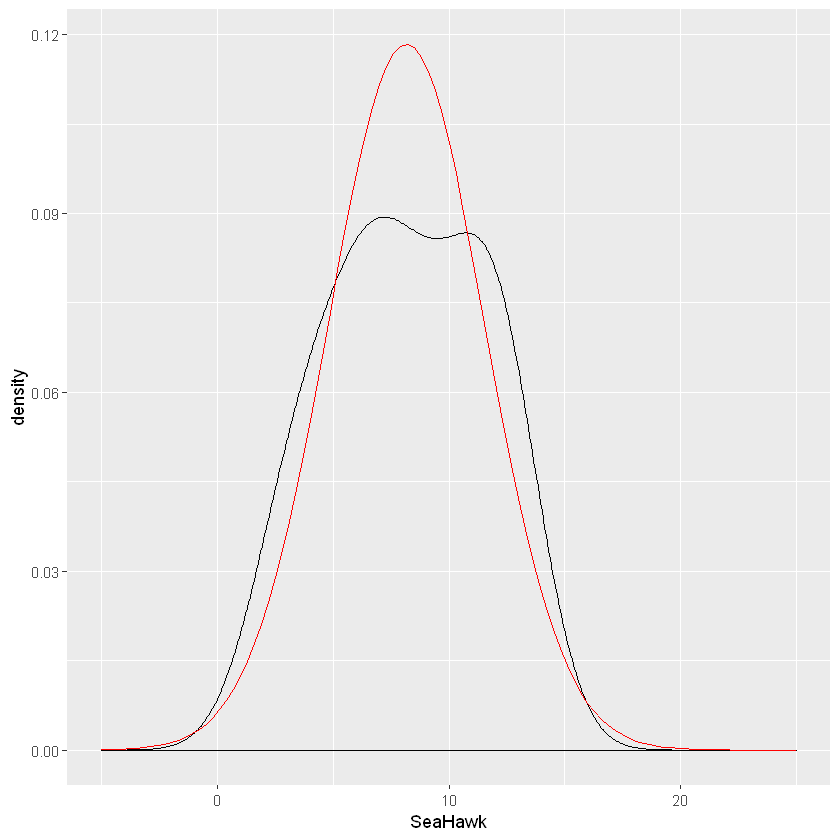

In [5]:
ggplot(data=lake_data,aes(x=Randall))+geom_density()+
stat_function(fun=dnorm,color="red",args=list(mean=mean(lake_data$Randall),  sd=sd(lake_data$Randall))) + scale_x_continuous(limits = c(0, 20))

ggplot(data=lake_data,aes(x=SeaHawk))+geom_density()+stat_function(fun=dnorm,color="red",args=list(mean=mean(lake_data$SeaHawk),  sd=sd(lake_data$SeaHawk))) + scale_x_continuous(limits = c(-5, 25))

The data seems to follow closely to a normal distribution. Another method of evaluating normality is through a QQ plot.

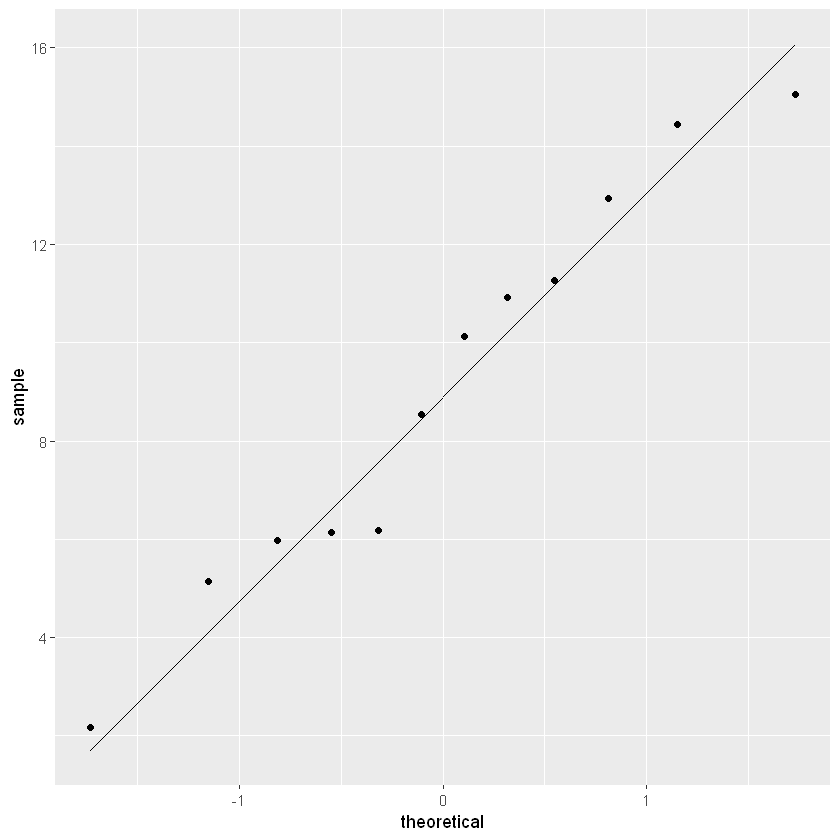

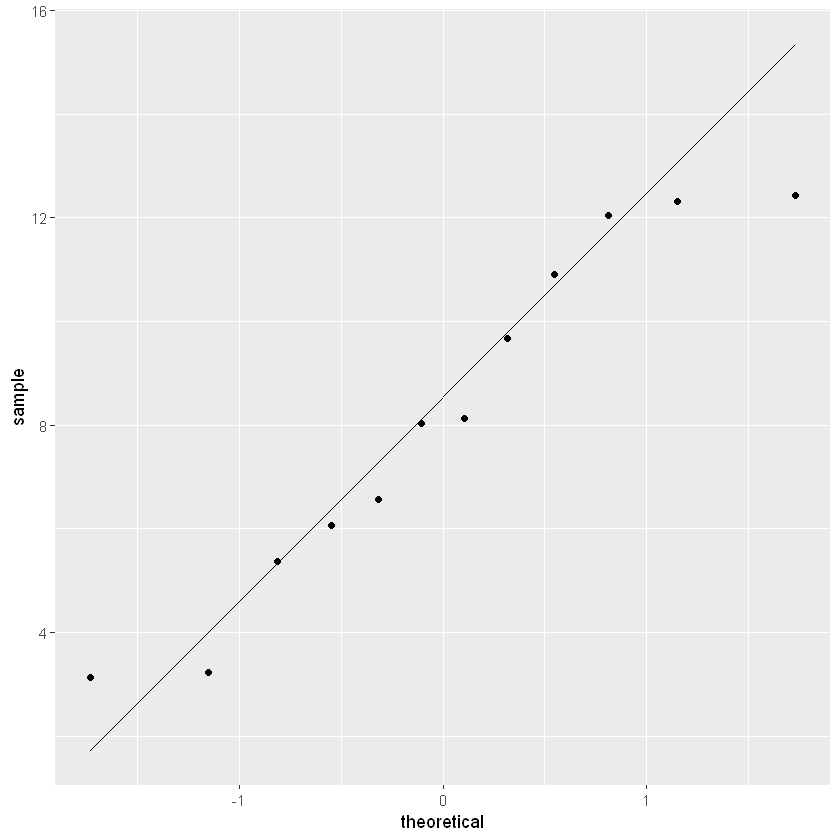

In [6]:
ggplot(data=lake_data,aes(sample=Randall))+stat_qq()+stat_qq_line()
ggplot(data=lake_data, aes(sample=SeaHawk))+stat_qq()+stat_qq_line()

The closer the points are to the black diagonal line, the more normally distributed the data.

Another way to test for normality is using the Shapiro-Wilks test. This test will give you a p-value that denotes whether the data is normally distributed or not. This test is helpful if you are having trouble interpreting the visualizations of normality. You will need to run the test on each group.

In [7]:
shapiro.test(lake_data$Randall)
shapiro.test(lake_data$SeaHawk)


	Shapiro-Wilk normality test

data:  lake_data$Randall
W = 0.95665, p-value = 0.7352



	Shapiro-Wilk normality test

data:  lake_data$SeaHawk
W = 0.92449, p-value = 0.3254


For this test a significant p-value (<.05) indicates that the distribution is significantly different from a normal distribution. Therefore, a significant p-value indicates that the normality assumption was violated. For both of our groups, the p-value is not less than .05, therefore the data meets the assumption of normality. Now we can proceed with the analysis!

## One Sample T-Test
The one sample T-test is appropriate when you know the population mean of the distribution and are examining whether one sample mean is significantly different from the population mean. For example let's say that the population mean (i.e., the mean monthly rainfall for all lakes in North America) is 64mm. We are comparing the average monthly rainfall in lakes Randall and SeaHawk to this population mean of 64mm to see if there is a statistically significant difference.

In [8]:
onesample_randall<-t.test(lake_data$Randall,alternative=("two.sided"), mu=64)
onesample_randall
onesample_seahawk<-t.test(lake_data$SeaHawk,alternative=("two.sided"),mu=64)
onesample_seahawk


	One Sample t-test

data:  lake_data$Randall
t = -47.187, df = 11, p-value = 4.744e-14
alternative hypothesis: true mean is not equal to 64
95 percent confidence interval:
  6.512964 11.636826
sample estimates:
mean of x 
 9.074895 



	One Sample t-test

data:  lake_data$SeaHawk
t = -57.394, df = 11, p-value = 5.549e-15
alternative hypothesis: true mean is not equal to 64
95 percent confidence interval:
  6.015998 10.298997
sample estimates:
mean of x 
 8.157498 


Above shows the output of our t-tests. You can see in our code we input the vector in which we are getting our sample mean from, whether we want a directional or non-directional hypothesis, and the population mean. The primary value you are looking for is the p-value. For both of our lakes the p-value is very small, considerably lower than .05. This suggests that for both lakes there is a statistically significant difference between the sample mean and the population mean. If you want to know the direction of this difference, all you have to look at is the sample mean. For example, in Lake Randall the mean monthly rainfall is 9.08. 9.08 is less than 64, therefore we can say that the average monthly rainfall for Lake Randall was significantly lower than the population mean.

## Effect Size
The effect size for a one sample t-test is called Cohen's D. This value will tell you the magnitude of your effect size (whether it is a large effect or a small effect). Below is the interpretation for each effect size value according to Cohen (1992)
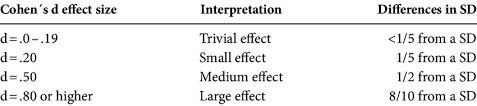

In [9]:
CohensD_singleT_randall<-cohensD(x=lake_data$Randall,mu=64)
CohensD_singleT_randall
CohensD_singleT_seahawk<-cohensD(x=lake_data$SeaHawk,mu=64)
CohensD_singleT_seahawk

[1] 13.62166

[1] 16.56812

According to the Cohen's d effect size interpretation, the effects for each lake are very large! This suggests there is a very large difference in the population mean and the sample means for the two lakes.

# Independent Sample T-Test
Let's say that instead of comparing the sample means of the two lakes to a population mean you want to compare the mean monthly  rainfall in Lake Randall, to the mean monthly rainfall in Lake SeaHawk. Now, we are comparing two independent groups to eachother and thus we should run an Independent Sample T-Test.

## Assumptions
Running an Independent T-test comes with additional assumptions to be tested. The assumption of normality still stands so just like above you should assess normality using histograms, QQ-plots, and/or the Shapiro-Wilks test. Now we are introducing two new assumptions: Homogeneity of Variance (HOV) and Independence of Observations.
### Independence
The assumption of independent groups is not something that we can formally test for, but is something that is taken into consideration when designing your research experiment. You want to make sure that your two groups are completely independent of eachother. In this case the measurements of rainfall are taken from two different lakes, thus our design meets the assumption of independence. A violation of independence would be if measures of rainfall were taken from the same lake at different time periods. Or perhaps if the two lakes were in the same geographical location. Other violations of normality would be if data were taken from the sampe participants at different time points, such as in a pre/post design, of if the participants were in some way related to eachother. For example, if a researcher wanted to examine differences in anxiety scores across males and females, a violation of independence would be if participants in the two groups came from the same family. Research design is a critical component to consider when choosing statistical tests.
### Homogeneity of Variance
Another important assumption of an independent t-test is that the variances between the two groups are equal. Variance is a measure of dispersion of your data. If one group has very high variance (participants have a wider range of different scores) and another group has very low variance (all scores are close to the mean; or a small range of different scores), then this will skew the interpretation of the mean comparison. We can test for homoheneity of variance using a Levene's Test.

First, I am going to convert the data to long format, which is necessary for running the Levene's test and the Independent T-Test. You will also need to activate a package called car.

In [10]:
library(tidyr)
long_lake<-gather(data=lake_data,"Lake","Rainfall_mm",3:4)
long_lake

Month,Period,Lake,Rainfall_mm
Jan,2001-2019,SeaHawk,3.125990
Feb,2001-2019,SeaHawk,12.441331
Mar,2001-2019,SeaHawk,3.230104
Apr,2001-2019,SeaHawk,10.907835
May,2001-2019,SeaHawk,9.674827
Jun,2001-2019,SeaHawk,8.033946
Jul,2001-2019,SeaHawk,12.318558
Aug,2001-2019,SeaHawk,6.557286
Sep,2001-2019,SeaHawk,6.057994
Oct,2001-2019,SeaHawk,12.040164


Let's check for homogeneity of variance with the Levene's Test.

In [11]:
HOV<-leveneTest(Rainfall_mm~Lake, center=mean, data=long_lake)
HOV


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."

,Df,F value,Pr(>F)
group,1,0.6757906,0.4198607
,22,NA,NA


A significant p-value on a Levene's test indicates that the variances of each group are significantly different from eachother. Thus, we do **not** want our p-value to be less than .05. If you look at the Pr(>F) column our p-value is greater than .05. Therefore we meet the assumption of homogeneity of variance and can proceed with our analysis. However, I will also discuss a correction that can be used if the homogeneity of variance assumption is violated.

## Independent T-Test
Let's run our t-test! Use the code below.

lake_w_HOV<-t.test(Rainfall_mm~Lake, var.equal=TRUE, data=long_lake)
lake_w_HOV

It looks like our p-value is 0.55. This indicates that there is no significant difference in the mean monthly rainfall for Lake Randall and Lake SeaHawk. Thus, we fail to reject our null hypothesis. The code below is for the Welch's t-test which corrects for unequal variance. You would use this test instead if your data violated the homogeneity of variance assumption.

In [12]:
lake_no_HOV<-t.test(Rainfall_mm~Lake, data=long_lake)
lake_no_HOV


	Welch Two Sample t-test

data:  Rainfall_mm by Lake
t = 0.60471, df = 21.329, p-value = 0.5518
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.234599  4.069393
sample estimates:
mean in group Randall mean in group SeaHawk 
             9.074895              8.157498 


Unsurprisingly, the test results are the same because we did not violate the HOV assumption. However, it is important to use this correct when necessary.

### Effect Size
We are once again going to use Cohen's D for the measure of effect size even though the result was not significant. For this code I am going to use our original data which is in wide format.

In [13]:
independenttCD<-cohensD(lake_data$Randall, lake_data$SeaHawk, method="pooled")
independenttCD

[1] 0.2468715

As suspected, the Cohen's D test suggests a small effect size. 

# Paired Samples T-Test

The final t-test is the paired samples t-test. This is also called a dependent t-test or a related samples t-test because the assumption of independence is no longer needed. The two groups are related to eachother. This test is common in pre/post designs where the same subjects are tested at different time points. For example, a paired t-test would be appropriate if average monthly rainfall data was calculated for one lake in 2020 and measured again in 2021. Thus, the test would allow us to see if there was a significant difference in average monthly rainfall in 2020 compared to 2021. Let's read in some new data!

In [14]:
pre_post<-read.table("pre_post_lake.txt")
pre_post$month<-as.factor(pre_post$month)
pre_post$year<-factor(pre_post$year, levels=c(1:2),labels=c("2020","2021"))
pre_post

year,month,rainfall_mm
2020,1,5.647385
2020,2,27.186771
2020,3,55.505624
2020,4,1.919519
2020,5,11.236393
2020,6,52.256103
2020,7,59.832627
2020,8,12.586680
2020,9,47.366872
2020,10,24.724103


You additionally want to ensure that both groups are normally distributed using the shapiro-wilks test. I've already checked this assumption and we are all set to continue with the analysis. Before we begin, unlike the independent sample t-test, the data needs to be in wide format. We need a column for each group. Just like you learned in module four, we should use the spread function.

In [15]:
pre_post<-spread(pre_post, key="year", value="rainfall_mm")
names<-c("month","time_one","time_two")
names(pre_post)<-names
pre_post

month,time_one,time_two
1,5.647385,93.84951
2,27.186771,96.50538
3,55.505624,108.56889
4,1.919519,104.75443
5,11.236393,90.22995
6,52.256103,94.58836
7,59.832627,82.42864
8,12.586680,117.21645
9,47.366872,82.23666
10,24.724103,105.34805


### Paired T-Test

In [16]:
pairedt<-t.test(pre_post$time_one,pre_post$time_two,paired=TRUE)
pairedt


	Paired t-test

data:  pre_post$time_one and pre_post$time_two
t = -8.9796, df = 11, p-value = 2.143e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -88.32652 -53.55087
sample estimates:
mean of the differences 
               -70.9387 


Taking a look at our p-value, it is less than .05 suggesting a signficant difference in rainfall between the two time points. We can reject the null hypothesis.

### Effect Size

Just like our other tests, we are going to use Cohen's D as the measure of effect size. 

In [17]:
pairedtcohensd<- cohensD(pre_post$time_two, pre_post$time_one, method = "paired")
pairedtcohensd

[1] 2.592175